<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/master/7506_Org_de_Datos_2021_Finger1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT FILES FROM DRIVE INTO GOOGLE-COLAB:

#STEP-1: Import Libraries

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1Mtm4TQObj17MH82_teT8gXyx6CwoqE7P'}) # replace the id with id of file you want to access
downloaded.GetContentFile('country_vaccinations.csv') 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r'country_vaccinations.csv') 
df.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,41.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,46.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,52.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12514 entries, 0 to 12513
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              12514 non-null  object 
 1   iso_code                             12514 non-null  object 
 2   date                                 12514 non-null  object 
 3   total_vaccinations                   7476 non-null   float64
 4   people_vaccinated                    6811 non-null   float64
 5   people_fully_vaccinated              4901 non-null   float64
 6   daily_vaccinations_raw               6285 non-null   float64
 7   daily_vaccinations                   12297 non-null  float64
 8   total_vaccinations_per_hundred       7476 non-null   float64
 9   people_vaccinated_per_hundred        6811 non-null   float64
 10  people_fully_vaccinated_per_hundred  4901 non-null   float64
 11  daily_vaccinations_per_milli

In [ ]:
df.count()

country                                12514
iso_code                               12514
date                                   12514
total_vaccinations                      7476
people_vaccinated                       6811
people_fully_vaccinated                 4901
daily_vaccinations_raw                  6285
daily_vaccinations                     12297
total_vaccinations_per_hundred          7476
people_vaccinated_per_hundred           6811
people_fully_vaccinated_per_hundred     4901
daily_vaccinations_per_million         12297
vaccines                               12514
source_name                            12514
source_website                         12514
dtype: int64

In [ ]:
df_completar = df.fillna('None')

In [ ]:
df_completar.count()

country                                12514
iso_code                               12514
date                                   12514
total_vaccinations                     12514
people_vaccinated                      12514
people_fully_vaccinated                12514
daily_vaccinations_raw                 12514
daily_vaccinations                     12514
total_vaccinations_per_hundred         12514
people_vaccinated_per_hundred          12514
people_fully_vaccinated_per_hundred    12514
daily_vaccinations_per_million         12514
vaccines                               12514
source_name                            12514
source_website                         12514
dtype: int64

In [ ]:
#Obtengo los Maximos agrupando por pais
df_personas_vacunadas = df.groupby('country').max()
df_personas_vacunadas

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,3000.0,0.31,0.31,NaN,77.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
Albania,ALB,2021-04-18,332905.0,6073.0,655.0,19525.0,17346.0,11.57,0.21,0.02,6028.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://twitter.com/GManastirliu/status/138349...
Algeria,DZA,2021-02-19,75000.0,NaN,NaN,30.0,3748.0,0.17,NaN,NaN,85.0,Sputnik V,Ministry of Health,https://www.echoroukonline.com/%d9%84%d9%82%d8...
Andorra,AND,2021-04-12,19064.0,9781.0,4484.0,2829.0,679.0,24.67,12.66,5.80,8788.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/comunicats/item/12642-me...
Angola,AGO,2021-04-11,245442.0,245442.0,NaN,NaN,10939.0,0.75,0.75,NaN,333.0,Oxford/AstraZeneca,Ministry of Health,https://www.verangola.net/va/en/042021/Health/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,VEN,2021-04-12,250000.0,250000.0,NaN,NaN,15200.0,0.88,0.88,NaN,535.0,Sputnik V,Government of Venezuela,https://www.swissinfo.ch/spa/coronavirus-venez...
Vietnam,VNM,2021-04-18,79182.0,79182.0,NaN,11393.0,3709.0,0.08,0.08,NaN,38.0,Oxford/AstraZeneca,Government of Vietnam,https://nhandan.com.vn/tin-tuc-y-te/da-nang-gh...
Wales,OWID_WLS,2021-04-17,2286756.0,1685298.0,601458.0,40211.0,33151.0,72.53,53.45,19.08,10515.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [ ]:
#Ordeno de acuerdo a los paises que ams vacunaciones realizaron
paises_mas_vacunacion = df_personas_vacunadas.sort_values('people_vaccinated',ascending=False)
paises_mas_vacunacion

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
United States,USA,2021-04-18,209406814.0,131247546.0,84263408.0,4629928.0,3384387.0,62.61,39.24,25.20,10120.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
India,IND,2021-04-18,123852566.0,107371770.0,16480796.0,4265157.0,3659357.0,8.97,7.78,1.19,2652.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,http://mohfw.gov.in/pdf/CumulativeCOVIDVaccina...
United Kingdom,GBR,2021-04-17,42780069.0,32849223.0,9930846.0,844285.0,602266.0,63.02,48.39,14.63,8872.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
England,OWID_ENG,2021-04-17,35882008.0,27559381.0,8322627.0,756873.0,507875.0,63.75,48.96,14.79,9023.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
Brazil,BRA,2021-04-18,32947066.0,24350046.0,8597020.0,3368729.0,1135847.0,15.50,11.46,4.04,5344.0,"Oxford/AstraZeneca, Sinovac",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ethiopia,ETH,2021-04-08,430000.0,NaN,NaN,NaN,NaN,0.37,NaN,NaN,NaN,Oxford/AstraZeneca,Ministry of Health,https://www.facebook.com/EthiopiaFMoH/posts/17...
Mongolia,MNG,2021-04-17,634240.0,NaN,NaN,52564.0,39349.0,19.35,NaN,NaN,12003.0,Oxford/AstraZeneca,Ministry of Health via ikon.mn,https://ikon.mn/
Nepal,NPL,2021-04-05,1700000.0,NaN,NaN,NaN,44361.0,5.83,NaN,NaN,1523.0,Oxford/AstraZeneca,Government of Nepal,http://www.xinhuanet.com/english/asiapacific/2...


In [ ]:
#Obtengo el pais que mas vacunaciones realizo

paises_mas_vacunacion.head(1)

,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
country,,,,,,,,,,,,,,
United States,USA,2021-04-18,209406814.0,131247546.0,84263408.0,4629928.0,3384387.0,62.61,39.24,25.2,10120.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


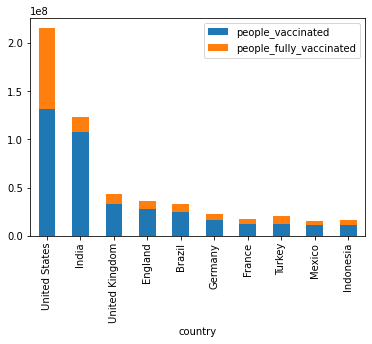

In [ ]:
#ax = plt.subplot()
ax.set_title('TOP 10 Paises con personas con 1 dosis & personas con ambas dosis',fontdict={'fontsize':20,'fontweight':1000})
tdf_1 = paises_mas_vacunacion.drop(['iso_code', 'total_vaccinations','daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'], axis = 1)
top10_paises_mas_vacunacion = tdf_1.head(10)
top10_paises_mas_vacunacion.plot.bar(stacked=True)

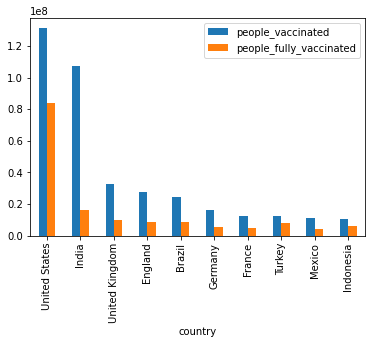

In [ ]:
ax.set_title('TOP 10 Paises personas con 1 dosis vs personas con ambas dosis',fontdict={'fontsize':20,'fontweight':1000})
#tdf_1 = covid_vaccine_data_f.drop(['index','iso_code', 'total_vaccinations','daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'], axis = 1)
#covid_vaccine_data_f_1= tdf_1.reset_index().groupby('country').max()
#covid_vaccine_data_f_1 = covid_vaccine_data_f_1.sort_values('people_vaccinated', ascending=False)
top10_paises_mas_vacunacion_1 = tdf_1.head(10)

ax = top10_paises_mas_vacunacion_1.plot.bar(rot=90)

plt.show()